# *Exploring the Influence of Weather on TTC Streetcar Delays and Forecasting Delays*

- Created on: October, 2023
- Created by: Jessica Seo
---------

## 🚂Exploratory Data Analysis

### Note Content

- Introduction
- Data Dictionary
- Data Preparation and EDA
- Looking at how weather influences stretcar delays
- Summary
- Data Saving
-------

### Introduction

This notebook will analyze the relationship between streetcar delays and weather conditions in the city of Toronto from January 2021 to September 2023. It includes cleaning irrelevant data and handling missing values to prepare for exploratory data analysis (EDA).

### Data Dictionary 


- `Datetime`: Date and time of when weather data and streetcar delay was recorded between January, 01, 2021 to September 30, 2023.

Weather:

- `Temperature`: The temperature in degrees Celsius. 
- `Precipitation` : Precipitation amount stored in mm.
- `Summer_PT` : Percieved temperature in Summer to indicate hot temperature.
- `Winter_PT` : Percieved temperature in Winter to indicate cold temperature.
- `Visibility` : Visibility of weather atmosphere in km.
- `Weather` : Observations of atmospheric phenomenon.


Streetcar:

- `Delaytime`: When the delay causing incident occurred.
- `Day`: The name of the day.
- `Min Delay` : The actual delay minutes.
- `Min Gap` : The total scheduled time in minutes between the streetcar in front and the following streetcar.  
 <br>
 
- `Route` : The number of streetcar route.
- `Line` : Streetcar number. 
- `Vehicle` : Vehicle number. 
- `Location` : The loccation of the delay.
- `Incident` : The description of the dleay causing incident. 

----
### Data Preparation and EDA

In [1]:
#importing necessary python library
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading merged datasest
raw_df=pd.read_csv('Streetcar_Weather_Data.csv')
raw_df

,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,datetime,Temp Definition °C,Precip. Amount Definition mm,Visibility Definition km,Hmdx Definition,Wind Chill Definition,Weather Definition
0,501,03:15,Friday,QUEEN AND MCCAUL,Operations,19,24,4574,2021-01-01 03:00:00,-2.0,0.0,16.1,NaN,-4.0,LegendNANA
1,504,03:37,Friday,BROADVIEW AND QUEEN,Operations,15,30,4500,2021-01-01 03:00:00,-2.0,0.0,16.1,NaN,-4.0,LegendNANA
2,504,04:00,Friday,BROADVIEW STATION,Cleaning,15,30,4589,2021-01-01 04:00:00,-1.4,0.0,16.1,NaN,-3.0,LegendNANA
3,504,04:03,Friday,DUNDAS WEST STATION,Cleaning,15,30,4582,2021-01-01 04:00:00,-1.4,0.0,16.1,NaN,-3.0,LegendNANA
4,506,05:37,Friday,MAIN STATION,Mechanical,10,20,3480,2021-01-01 05:00:00,0.4,0.0,16.1,NaN,NaN,LegendNANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,511,22:53,Saturday,FLEET AND MANITOBA,Diversion,44,54,4593,2023-09-30 22:00:00,16.6,0.0,16.1,NaN,NaN,LegendNANA
42398,505,23:21,Saturday,KINGSTON RD LOOP,Security,10,20,4503,2023-09-30 23:00:00,16.9,0.0,16.1,NaN,NaN,LegendNANA
42399,513,23:41,Saturday,1626 QUEEN ST EAST,Operations,10,10,8818,2023-09-30 23:00:00,16.9,0.0,16.1,NaN,NaN,LegendNANA
42400,501,00:48,Saturday,QUEEN AND AUGUSTA,Diversion,41,61,0,2023-09-30 00:00:00,16.9,0.0,16.1,NaN,NaN,LegendNANA


In [4]:
#changing column orders 
change_column=['datetime','Temp Definition °C', 'Precip. Amount Definition mm', 'Hmdx Definition', 'Wind Chill Definition','Visibility Definition km','Weather Definition','Day','Time','Vehicle','Line','Location','Incident','Min Delay','Min Gap']
raw_df=raw_df.reindex(columns=change_column)
raw_df

,datetime,Temp Definition °C,Precip. Amount Definition mm,Hmdx Definition,Wind Chill Definition,Visibility Definition km,Weather Definition,Day,Time,Vehicle,Line,Location,Incident,Min Delay,Min Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,LegendNANA,Friday,03:15,4574,501,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,LegendNANA,Friday,03:37,4500,504,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,LegendNANA,Friday,04:00,4589,504,BROADVIEW STATION,Cleaning,15,30
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,LegendNANA,Friday,04:03,4582,504,DUNDAS WEST STATION,Cleaning,15,30
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,16.1,LegendNANA,Friday,05:37,3480,506,MAIN STATION,Mechanical,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,2023-09-30 22:00:00,16.6,0.0,NaN,NaN,16.1,LegendNANA,Saturday,22:53,4593,511,FLEET AND MANITOBA,Diversion,44,54
42398,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,16.1,LegendNANA,Saturday,23:21,4503,505,KINGSTON RD LOOP,Security,10,20
42399,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,16.1,LegendNANA,Saturday,23:41,8818,513,1626 QUEEN ST EAST,Operations,10,10
42400,2023-09-30 00:00:00,16.9,0.0,NaN,NaN,16.1,LegendNANA,Saturday,00:48,0,501,QUEEN AND AUGUSTA,Diversion,41,61


In [5]:
#renaming columns
raw_df.columns=['Datetime','Temperature','Precipitation','Summer_PT','Winter_PT','Visibility','Weather','Day','Time','Vehicle','Line','Location','Incident','Min_Delay','Min_Gap']
raw_df

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,LegendNANA,Friday,03:15,4574,501,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,LegendNANA,Friday,03:37,4500,504,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,LegendNANA,Friday,04:00,4589,504,BROADVIEW STATION,Cleaning,15,30
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,LegendNANA,Friday,04:03,4582,504,DUNDAS WEST STATION,Cleaning,15,30
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,16.1,LegendNANA,Friday,05:37,3480,506,MAIN STATION,Mechanical,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,2023-09-30 22:00:00,16.6,0.0,NaN,NaN,16.1,LegendNANA,Saturday,22:53,4593,511,FLEET AND MANITOBA,Diversion,44,54
42398,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,16.1,LegendNANA,Saturday,23:21,4503,505,KINGSTON RD LOOP,Security,10,20
42399,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,16.1,LegendNANA,Saturday,23:41,8818,513,1626 QUEEN ST EAST,Operations,10,10
42400,2023-09-30 00:00:00,16.9,0.0,NaN,NaN,16.1,LegendNANA,Saturday,00:48,0,501,QUEEN AND AUGUSTA,Diversion,41,61


In [6]:
#checking datatypes
raw_df.dtypes

Datetime          object
Temperature       object
Precipitation    float64
Summer_PT        float64
Winter_PT        float64
Visibility        object
Weather           object
Day               object
Time              object
Vehicle            int64
Line              object
Location          object
Incident          object
Min_Delay          int64
Min_Gap            int64
dtype: object

We can work to convert `Datetime`, `Temperature`, `Visibility` and `Line` columns. 

In [7]:
#converting datetime
raw_df['Datetime'] =pd.to_datetime(raw_df['Datetime']) 

In [8]:
#sanity check
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42402 entries, 0 to 42401
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       42402 non-null  datetime64[ns]
 1   Temperature    42337 non-null  object        
 2   Precipitation  42337 non-null  float64       
 3   Summer_PT      7242 non-null   float64       
 4   Winter_PT      7184 non-null   float64       
 5   Visibility     42337 non-null  object        
 6   Weather        42337 non-null  object        
 7   Day            42402 non-null  object        
 8   Time           42402 non-null  object        
 9   Vehicle        42402 non-null  int64         
 10  Line           42186 non-null  object        
 11  Location       42402 non-null  object        
 12  Incident       42401 non-null  object        
 13  Min_Delay      42402 non-null  int64         
 14  Min_Gap        42402 non-null  int64         
dtypes: datetime64[ns](1

In [11]:
raw_df.shape

(42402, 15)

In [13]:
#checking dupicates first before converting
raw_df.duplicated().sum()

137

In [14]:
raw_df.duplicated().sum()/raw_df.shape[0]*100

0.32309796707702465

In [15]:
#looking at duplicated values
raw_df.loc[raw_df.duplicated(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
40,2021-01-01 17:00:00,2.3,0.0,NaN,NaN,16.1,LegendNANA,Friday,17:49,3451,506,MAIN STREET STATION,Operations,7,14
42,2021-01-01 20:00:00,0.6,2.0,NaN,NaN,3.2,Snow,Friday,20:35,4492,504,BROADVIEW STATION,Operations,10,20
88,2021-01-02 15:00:00,1.7,0.0,NaN,NaN,16.1,LegendNANA,Saturday,15:36,4445,510,SPADINA AND QUEEN'S QU,Cleaning,7,14
93,2021-01-02 19:00:00,1.5,0.0,NaN,NaN,16.1,LegendNANA,Saturday,19:14,4428,510,UNION STATION,Cleaning,5,10
123,2021-01-03 18:00:00,1.3,0.0,NaN,NaN,16.1,LegendNANA,Sunday,18:14,4543,509,EXHIBITION LOOP,Operations,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40705,2023-08-13 15:00:00,23.4,0.0,27.0,NaN,16.1,LegendNANA,Sunday,15:38,4563,509,UNION STATION,General Delay,6,13
40949,2023-08-19 17:00:00,18.6,0.0,NaN,NaN,16.1,LegendNANA,Saturday,17:13,4483,505,QUEEN AND WOODFIELD,Operations,10,20
41049,2023-08-22 08:00:00,20.0,0.0,NaN,NaN,16.1,LegendNANA,Tuesday,08:23,1503,503,BINGHAM LOOP,Mechanical,10,20
41327,2023-08-29 16:00:00,23.1,0.0,27.0,NaN,16.1,LegendNANA,Tuesday,16:10,3515,501,GERRARD AND MUNRO,Mechanical,7,14


In [16]:
#drop duplicated to only keep unique values
df = raw_df.drop_duplicates()

In [17]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns.')

We have 42265 rows and 15 columns.


In [18]:
#Sanity check
42402-137

42265

In [19]:
#checking null values.
df.isna().sum()

Datetime             0
Temperature         64
Precipitation       64
Summer_PT        35041
Winter_PT        35100
Visibility          64
Weather             64
Day                  0
Time                 0
Vehicle              0
Line               216
Location             0
Incident             1
Min_Delay            0
Min_Gap              0
dtype: int64

In [20]:
df.isna().sum()/df.shape[0]*100

Datetime          0.000000
Temperature       0.151426
Precipitation     0.151426
Summer_PT        82.907843
Winter_PT        83.047439
Visibility        0.151426
Weather           0.151426
Day               0.000000
Time              0.000000
Vehicle           0.000000
Line              0.511061
Location          0.000000
Incident          0.002366
Min_Delay         0.000000
Min_Gap           0.000000
dtype: float64

Interestingly, `Temperature`, `Precipitation`, `Visibility`, `Weather` all have 64 missing values.

In [21]:
#Let's check them out
nulls = df[['Temperature', 'Precipitation', 'Visibility', 'Weather']].isna().any(axis=1)
df[nulls].sort_values(by='Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,14:39,8799,506,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,14:41,4586,505,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,14:46,4498,506,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,16:10,8039,504,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Monday,11:02,8504,501,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,11:18,8698,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,11:44,4592,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,11:48,4556,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,17:05,8090,501,ROYAL YORK AND LAKESHO,General Delay,25,31


In the process of merging streetcar data and weather data, weather data rows had to be duplicated to join the streetcar data, as there are multiple delays within a one-hour time frame. It's challenging to make a reliable decision, given that all of them are null values. We will review each column to handle missing values. While these empty rows won't significantly impact our entire dataset due to the large number of data, it is reasonable to assume that weather does not change drastically within an hour. Although `Summer_PT` and `Winter_PT` account for 80% of the entire dataset, we will retain them as they only indicate extremely hot or cold weather.

### EDA

Let's start with `Temperature`.

In [22]:
#Temperature value counts
df['Temperature'].value_counts()

LegendMM    406
2.0         277
19.6        233
2.2         227
20.8        225
           ... 
-14.8         1
-13.2         1
-18.5         1
-18.2         1
-16.5         1
Name: Temperature, Length: 500, dtype: int64

In [23]:
df['Temperature'].unique()

array(['-2.0', '-1.4', '0.4', '0.0', '0.5', '1.4', '1.5', '1.7', '2.2',
       '2.1', '2.3', '0.6', '1.2', '-1.2', '0.1', '-0.5', '1.3', '1.6',
       '1.8', '1.9', '0.8', '1.0', '0.7', '1.1', '0.9', '2.0', '-0.8',
       '-1.1', '-1.7', '0.3', '-0.6', '-1.0', '-2.1', '-2.4', '-3.0',
       '-4.7', '-7.2', '-7.4', '-7.1', '-7.3', '-5.9', '-4.5', '-4.4',
       '-4.0', '-3.6', '-4.9', '-3.4', '-4.1', '-1.5', '-1.9', '-1.8',
       '-1.3', '4.1', '3.9', '0.2', '-0.9', '-0.3', '-0.7', '-2.9',
       '-2.5', '-1.6', '-0.4', '-0.1', '3.5', '3.1', '2.9', '2.6', '3.4',
       '4.7', '3.8', '4.4', '4.5', '4.3', '3.3', '4.0', '2.5', '2.8',
       '-3.3', '-0.2', '-2.8', '-5.4', '-6.3', '-6.2', '-5.2', '-4.8',
       '-3.8', '-3.7', '-3.9', '-2.3', '3.2', '-4.2', '-5.1', '-5.7',
       '-9.9', '-10.3', '-9.7', '-7.9', '-4.6', '-5.6', '-5.8', '-5.5',
       '-2.7', '-2.6', '-2.2', '-5.0', '-3.5', '-3.2', '-6.4', '-6.1',
       '-6.9', '-11.7', '-11.8', '-10.5', '-9.6', '-8.4', '-8.0', '-6.8',
   

There are more null values than we had checked before. 'LegendMM' indicates Missing values according to *Environment Canada*.

In [24]:
#Replacing LegendMM values to null to work on it all together.
df['Temperature'].replace(['LegendMM'], [None]).value_counts(dropna=False)

None     406
2.0      277
19.6     233
2.2      227
20.8     225
        ... 
-14.8      1
-13.2      1
-18.5      1
-18.2      1
-16.5      1
Name: Temperature, Length: 501, dtype: int64

In [25]:
#Storing the new information
df['Temperature'].replace(['LegendMM'], [None], inplace=True)

In [26]:
#Sanity check
df['Temperature'].value_counts(dropna=False)

None     406
2.0      277
19.6     233
2.2      227
20.8     225
        ... 
-14.8      1
-13.2      1
-18.5      1
-18.2      1
-16.5      1
Name: Temperature, Length: 501, dtype: int64

In [27]:
#Now convert Temperature datatype now that all the values are numerical. 
df['Temperature']=df['Temperature'].astype('float')

In [28]:
#Sanity check
df.Temperature.dtypes

dtype('float64')

#### Working on missing values.

In [29]:
#Looking at null value rows
df.loc[df.Temperature.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
1257,2021-02-08 23:00:00,NaN,0.0,NaN,NaN,3.2,Snow,Monday,23:46,4555,504,QUEEN AND BROADVIEW,Mechanical,10,20
1260,2021-02-09 02:00:00,NaN,0.0,NaN,NaN,11.3,Snow,Tuesday,02:51,4443,504,KING AND BAY,Security,8,16
1262,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,16.1,Snow,Tuesday,05:04,4424,511,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,16.1,Snow,Tuesday,05:53,0,512,ST CLAIR TO GUNN LOOP,General Delay,0,0
3435,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,14:39,8799,506,COXWELL AND LOWER GERR,Cleaning,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,11:18,8698,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,11:44,4592,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,11:48,4556,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,17:05,8090,501,ROYAL YORK AND LAKESHO,General Delay,25,31


In [30]:
#Looking at them by date 
df[df.Datetime.dt.date==pd.Timestamp(2021, 2, 8)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
1220,2021-02-08 02:00:00,-10.6,0.0,NaN,-19.0,16.1,LegendNANA,Monday,02:13,4474,504,KING AND BAY,Security,15,30
1221,2021-02-08 03:00:00,-11.3,0.0,NaN,-19.0,16.1,LegendNANA,Monday,03:27,1562,504,KING AND RONCESVALLES,Emergency Services,20,40
1222,2021-02-08 04:00:00,-10.8,0.0,NaN,-18.0,16.1,LegendNANA,Monday,04:09,4523,510,SPADINA AND SUSSEX,Security,15,30
1223,2021-02-08 05:00:00,-10.5,0.0,NaN,-20.0,16.1,LegendNANA,Monday,05:35,8539,501,LONG BRANCH LOOP,Late,20,30
1224,2021-02-08 06:00:00,-10.7,0.0,NaN,-19.0,16.1,LegendNANA,Monday,06:19,1145,501,LAKESHORE AND FIFTHTEE,Operations,6,12
1225,2021-02-08 06:00:00,-10.7,0.0,NaN,-19.0,16.1,LegendNANA,Monday,06:51,4439,510,SPADINA STATION,Security,7,14
1226,2021-02-08 06:00:00,-10.7,0.0,NaN,-19.0,16.1,LegendNANA,Monday,06:52,4584,505,OSSINGTON AND COLLEGE,Operations,7,14
1227,2021-02-08 07:00:00,-10.5,0.0,NaN,-19.0,16.1,LegendNANA,Monday,07:27,3488,506,MAIN STREET STATION,Cleaning,4,8
1228,2021-02-08 08:00:00,-10.4,0.0,NaN,-17.0,16.1,LegendNANA,Monday,08:04,4487,506,HOWARD PARK AND RONCES,Mechanical,7,14
1229,2021-02-08 08:00:00,-10.4,0.0,NaN,-17.0,16.1,LegendNANA,Monday,08:13,4441,506,CARLTON AND SHERBOURNE,Overhead,85,92


In [ ]:
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

It appears that there are numerous null values in the dataset, repetitively occurring between 10-11 am, with temperature readings of 18.8 degrees and 22.5 degrees. We will use the 'ffill' method to impute the missing values as generally, temperature does not significantly change between hours.

In [31]:
#Imputating
df['Temperature']=df['Temperature'].ffill(axis=0)

In [32]:
#Checking if the null values are filled.
df['Temperature'].isna().sum()

0

#### Distribution between month and temperature.

In [ ]:
#Monthly value counts
df['Datetime'].dt.month.value_counts()

In [ ]:
#Average temperature per month.
df.groupby(df['Datetime'].dt.month)['Temperature'].mean()

In [ ]:
#Distribution of monthly average temperature from 2021-2023
df.groupby(df['Datetime'].dt.month)['Temperature'].mean().plot()

Let's check if `Precipitation` has hidden null values like the previous one.

In [ ]:
df.Precipitation.dtypes

In [ ]:
df.Precipitation.value_counts(dropna=False)

No hidden null values identified as the null value is same as what we alrady checked: 64 rows.

In [ ]:
#checking null value rows
df.loc[df.Precipitation.isna(), :].sort_values('Datetime')

In [ ]:
#checking if it rained that day.
df[df.Datetime.dt.date==pd.Timestamp(2021, 4, 8)]

In [35]:
df.Precipitation.isna().sum()

64

In [37]:
df.shape[0]

42265

In [34]:
#Percentage of Precipitation missing values 
df.Precipitation.isna().sum()/df.shape[0]*100

0.15142552939784693

It appears that there are many missing values in the above dataframe, but it's important to note that these are duplicated rows created during the process of joining the streetcar data. Specifically, when the `Visibility` values are 16.1, we can reasonably assume that the sky was clear (detailed explanation to follow later). Therefore, we have the option to impute `Precipitation`'s missing values based on the `Visibility` values, or we can choose to leave them as these missing values are unlikely to significantly impact the entire dataset. 

Since we decided to fill in the values based on `Visibility`, let's check their relationship distribution.

In [ ]:
df.Precipitation.value_counts(dropna=False).sort_index(ascending=True)

In [ ]:
df.Visibility.value_counts(dropna=False).sort_index(ascending=True)

Based on this quick series, where `Visibility` has the most value counts in 16.1 is where it did not rain at all.

In order to check the distribution, we need to convert `Visibility`  datatype. We will work on the variable's hidden null values as well.

In [ ]:
#Getting rid of string value(LegendMM)
df['Visibility'].replace(['LegendMM'], [None]).value_counts(dropna=False)

In [38]:
#Replacing inplace
df['Visibility'].replace(['LegendMM'], [None], inplace=True)

In [39]:
#Toal number of missing values
df.Visibility.isna().sum()

85

In [40]:
#Percentage of missing values
df.Visibility.isna().sum()/df.shape[0]*100

0.20111203123151544

We will just fill it in with ffill value as again, it won't affect the the dataset.

In [42]:
df['Visibility']=df['Visibility'].ffill(axis=0)

In [43]:
#checking
df.Visibility.isna().sum()

0

In [44]:
#Now, let's conver datatype
df['Visibility']=df['Visibility'].astype('float')

In [ ]:
#checking
df.Visibility.dtype

In [ ]:
#Checking the distribution between Precipitation and Visibility
plt.figure()

plt.subplot(1, 2, 1)
plt.hist(df['Precipitation'], color='blue')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Precipitation Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['Visibility'], color='green')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Distribution')

plt.tight_layout()
plt.show()

As mentioned before, the histogram give us a reliable reason to fill in `Precipitation` value based on the `Visibility`. 

In [46]:
#Imputating and checking
condition1 = df['Visibility'] == 16.1
df.loc[condition1, 'Precipitation'] = df.loc[condition1, 'Precipitation'].fillna(0.0)
df.Precipitation.value_counts(dropna=False)

0.0     39380
0.2       956
0.5       490
0.8       340
1.0       210
1.5       178
1.2       120
1.8        76
2.0        73
2.5        70
2.2        57
3.2        40
4.0        33
3.0        33
2.8        19
3.8        14
4.5        13
3.5        11
NaN        10
4.3         9
3.3         9
5.5         8
5.0         7
5.3         7
6.8         7
4.8         7
5.8         6
8.8         6
14.2        5
9.6         5
2.3         5
7.8         5
1.3         5
11.6        4
11.4        4
7.6         4
15.4        4
5.2         4
6.0         4
8.6         3
4.2         3
0.1         3
13.9        2
9.0         2
5.6         2
8.9         2
8.0         2
18.2        2
10.6        1
6.3         1
10.3        1
1.4         1
9.8         1
6.6         1
Name: Precipitation, dtype: int64

In [47]:
#the rest of the missing values
df['Precipitation']=df['Precipitation'].ffill(axis=0)

In [48]:
#No missing values 
df.Precipitation.isna().sum()

0

Let's look into the `Weather` variable. This is the most important column as the project's focus is to analyze the influence between TTC streetcar delays and the city's weather conditions.

In [49]:
#Checking for hidden nulls values
df.Weather.value_counts(dropna=False)

LegendNANA                          36322
Rain                                 1869
Snow                                 1658
Fog                                   964
Rain, Fog                             784
Haze                                  250
NaN                                    64
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Thunderstorms,Moderate Rain, Fog        5
Freezing Rain, Snow                     4
Heavy Rain                        

So there is roughly, 36,000 hidden values.

In [50]:
df[df.Weather =='LegendNANA'].shape[0]

36322

In [52]:
#Percentage of missing values
df[df.Weather =='LegendNANA'].shape[0]/df.shape[0]*100

85.93871998107181

In [53]:
#Looking at all the null value rows 
df.loc[df.Weather.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,13.9,0.0,NaN,NaN,16.1,NaN,Thursday,14:39,8799,506,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,13.9,0.0,NaN,NaN,16.1,NaN,Thursday,14:41,4586,505,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,13.9,0.0,NaN,NaN,16.1,NaN,Thursday,14:46,4498,506,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,13.9,0.0,NaN,NaN,16.1,NaN,Thursday,16:10,8039,504,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,26.3,0.0,NaN,NaN,14.5,NaN,Monday,11:02,8504,501,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,18.8,0.0,NaN,NaN,16.1,NaN,Thursday,11:18,8698,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,18.8,0.0,NaN,NaN,16.1,NaN,Thursday,11:44,4592,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,18.8,0.0,NaN,NaN,16.1,NaN,Thursday,11:48,4556,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,18.5,0.0,NaN,NaN,16.1,NaN,Thursday,17:05,8090,501,ROYAL YORK AND LAKESHO,General Delay,25,31


It looks like we can find the relationship between `Visibility` and `Weather` and imputate the missing values in `Weather` column.  

We can assume weather conditions based on the visibility. 
- High Visibility (e.g., 10 km or more):  

Sunny or clear skies: High visibility is often associated with good weather conditions. 

- Moderate Visibility (e.g., 5-10 km):

Partly cloudy: Moderate visibility may suggest partially cloudy conditions.   
Hazy: Hazy conditions can reduce visibility, so you might assume hazy weather. 

- Low Visibility (e.g., less than 5 km):  

Foggy: Low visibility is commonly associated with foggy conditions.  
Rainy or drizzle: Poor visibility can be caused by rain or drizzle.   
Snowy: Low visibility can be an indicator of snowfall.   
Cloudy: Overcast conditions may reduce visibility as well.

Based on this Visibility general guideline, we can make a data driven decision to fill in the `Weather`.  We can also notice that there are no clear nor cloudy weather values, so we can guess that clear and cloudy days are in the `LegendNANA` value.


In [ ]:
#Checking the distribution
#Percentage of missing values('LegendNANA') when visibility is 16.1

In [61]:
per = df.loc[df.Weather=='LegendNANA', :].sort_values('Datetime')
per[per.Visibility==16.1].shape[0]

35454

In [62]:
per[per.Visibility==16.1].shape[0]/per.shape[0]*100

97.61026375199604

98% of missing values in Weather is when the `Visibility` is 16.1

In [63]:
per.Visibility.unique()

array([16.1, 14.5, 11.3, 12.9,  4.8,  1.6,  2. ])

In [64]:
per.Visibility.value_counts()

16.1    35454
12.9      327
14.5      300
11.3      232
4.8         3
1.6         3
2.0         3
Name: Visibility, dtype: int64

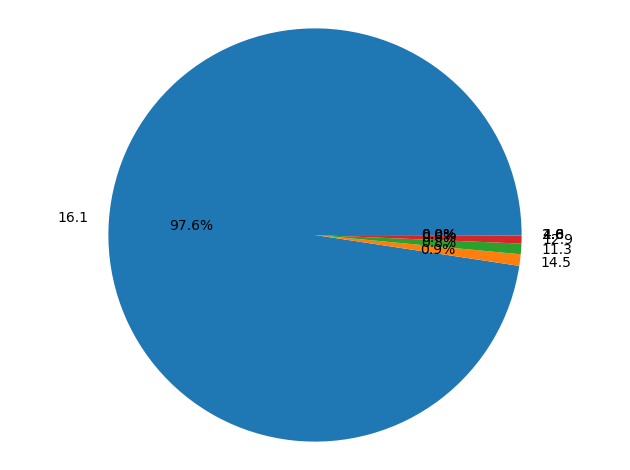

In [65]:
#Checking the distribution
labels = per.Visibility.unique()
sizes = per.Visibility.value_counts()


plt.figure()
plt.pie(sizes, labels=labels,autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [66]:
#Fill in Weather to Clear when visibility = 16.1 

condition1= df.Visibility == 16.1
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Clear')
df.Weather.value_counts()

Clear                               35454
Rain                                 1869
Snow                                 1658
Fog                                   964
LegendNANA                            868
Rain, Fog                             784
Haze                                  250
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Thunderstorms,Moderate Rain, Fog        5
Freezing Rain, Snow                     4
Heavy Rain                        

In [69]:
#Let's fill in 868 LegendNANA rows where it Visibility variable has the most count
visibility_values= df.loc[df.Weather == 'LegendNANA'].sort_values('Datetime')
visibility_values

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
113,2021-01-03 14:00:00,1.4,0.2,NaN,NaN,14.5,LegendNANA,Sunday,14:50,1345,501,LONG BRANCH LOOP,Security,8,16
114,2021-01-03 14:00:00,1.4,0.2,NaN,NaN,14.5,LegendNANA,Sunday,14:55,4522,511,BATHURST AND FLEET,Collision - TTC Involved,14,21
135,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.3,LegendNANA,Monday,09:19,0,505,DUNDAS WEST STATION,Operations,5,9
136,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.3,LegendNANA,Monday,09:19,4497,506,LANSDOWNE AND COLLEGE,Operations,7,14
137,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.3,LegendNANA,Monday,09:22,4487,510,SPADINA AND QUEENS QUA,Utilized Off Route,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42044,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,11.3,LegendNANA,Wednesday,18:40,4431,509,UNION STATION,Emergency Services,0,0
42401,2023-09-30 01:00:00,16.6,0.0,NaN,NaN,12.9,LegendNANA,Saturday,01:22,3346,301,QUEEN AND AUGUSTA,Security,41,61
42361,2023-09-30 02:00:00,16.3,0.0,NaN,NaN,14.5,LegendNANA,Saturday,02:26,4541,510,328 BLOOR STREET WEST,Cleaning - Unsanitary,10,20
42363,2023-09-30 09:00:00,19.3,0.0,NaN,NaN,12.9,LegendNANA,Saturday,09:21,4515,504,CHERRY ST AT FRONT ST,Cleaning - Unsanitary,10,20


In [71]:
visibility_values.Visibility.value_counts().sort_index(ascending=False)

14.5    300
12.9    327
11.3    232
4.8       3
2.0       3
1.6       3
Name: Visibility, dtype: int64

<Axes: >

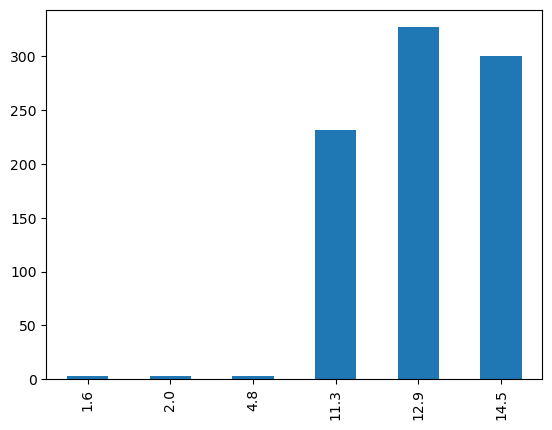

In [72]:
visibility_values.Visibility.value_counts().sort_index(ascending=True).plot(kind='bar')

In [73]:
#I want to see all the Weather values when visibility is 14.5 
visibility_condition=df[df.Visibility == 14.5]

visibility_condition.Weather.value_counts()

LegendNANA             300
Rain                    94
Snow                    34
Moderate Rain            4
Thunderstorms, Rain      3
Name: Weather, dtype: int64

In [74]:
#fill in 'Rain'
condition1= df.Visibility == 14.5
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Rain')
df.Weather.value_counts()

Clear                               35454
Rain                                 2169
Snow                                 1658
Fog                                   964
Rain, Fog                             784
LegendNANA                            568
Haze                                  250
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Thunderstorms,Moderate Rain, Fog        5
Freezing Rain, Snow                     4
Heavy Rain                        

In [75]:
visibility_condition=df[df.Visibility == 12.9]

visibility_condition.Weather.value_counts()

LegendNANA                      327
Rain                            128
Snow                             43
Moderate Rain                    10
Thunderstorms,Moderate Rain       2
Thunderstorms, Freezing Rain      2
Thunderstorms,Heavy Rain          1
Thunderstorms, Rain               1
Name: Weather, dtype: int64

In [76]:
#fill in 'Rain'
condition1= df.Visibility == 12.9
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Rain')
df.Weather.value_counts()

Clear                               35454
Rain                                 2496
Snow                                 1658
Fog                                   964
Rain, Fog                             784
Haze                                  250
LegendNANA                            241
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Thunderstorms,Moderate Rain, Fog        5
Freezing Rain, Snow                     4
Heavy Rain                        

In [77]:
visibility_condition=df[df.Visibility == 11.3]

visibility_condition.Weather.value_counts()

LegendNANA       232
Rain             112
Snow              49
Moderate Rain      6
Rain, Snow         4
Name: Weather, dtype: int64

In [78]:
#fill in 'Rain'
condition1= df.Visibility == 11.3
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Rain')
df.Weather.value_counts()

Clear                               35454
Rain                                 2728
Snow                                 1658
Fog                                   964
Rain, Fog                             784
Haze                                  250
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
LegendNANA                              9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Moderate Rain, Fog        5
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Freezing Rain, Snow                     4
Heavy Rain                        

In [81]:
#Imputation complete
df.Weather.value_counts(dropna=False)

Clear                               35454
Rain                                 2728
Snow                                 1658
Fog                                   964
Rain, Fog                             784
Haze                                  250
NaN                                    64
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
LegendNANA                              9
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms,Moderate Rain, Fog        5
Thunderstorms, Fog                      5
Freezing Rain, Snow               

In [ ]:
df[df.Weather=='LegendNANA'].shape[0]/df.shape[0]*100

In [82]:
#Will use ffill method to fill in the remaining
df['Weather']=df['Weather'].ffill(axis=0)

In [84]:
df.Weather.value_counts()

Clear                               35508
Rain                                 2736
Snow                                 1658
Fog                                   966
Rain, Fog                             784
Haze                                  250
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
LegendNANA                              9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Moderate Rain, Fog        5
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Freezing Rain, Snow                     4
Heavy Rain                        

In [85]:
#Imputation complete! 
df.Weather.isna().sum()

0

Our final variable to clean is `Line`. 

In [ ]:
df.Line.value_counts()

`Line` involves duplicated values with obvious typos and irregular patterns. We will clean the duplicates and leave it as it is. 

In [88]:
#Replacing 
df['Line'].replace(['503 KINGSTON ROAD (60','RAD 506',], ['503','506'], inplace=True)

In [89]:
df['Line'].replace(['RUN','(RAD'], ['RAD','RAD'], inplace=True)

In [90]:
df['Line'].replace('TEST CAR', 'TEST', inplace=True)

In [91]:
df[df['Line'] == 'STORM']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
33942,2023-02-17 05:00:00,-1.4,0.0,NaN,-8.0,9.7,Snow,Friday,05:10,4419,STORM,ST CLAIR AND BATHURST,General Delay,37,45


In [92]:
#What is the acutal Line for this row?
df[df['Location'] == 'ST CLAIR AND BATHURST'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
60,2021-01-02 08:00:00,-0.5,0.0,NaN,-5.0,16.1,Clear,Saturday,08:19,4527,512,ST CLAIR AND BATHURST,General Delay,5,10
62,2021-01-02 08:00:00,-0.5,0.0,NaN,-5.0,16.1,Clear,Saturday,08:22,4548,512,ST CLAIR AND BATHURST,General Delay,8,16
572,2021-01-18 15:00:00,0.6,0.0,NaN,NaN,16.1,Clear,Monday,15:36,4439,512,ST CLAIR AND BATHURST,Operations,10,20


In [93]:
#Replacing 
df['Line'].replace('STORM', '512', inplace=True)

In [94]:
#replace what seems to be typos
df[df['Line']=='5014']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
28070,2022-09-16 23:00:00,18.4,0.0,NaN,NaN,16.1,Clear,Friday,23:29,0,5014,KING AND SPADINA,General Delay,0,0


In [95]:
df[df['Location'] == 'KING AND SPADINA'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
94,2021-01-02 19:00:00,1.5,0.0,NaN,NaN,16.1,Clear,Saturday,19:39,4524,504,KING AND SPADINA,Security,0,0
97,2021-01-02 21:00:00,1.6,0.0,NaN,NaN,16.1,Clear,Saturday,21:56,4404,504,KING AND SPADINA,Emergency Services,17,26
350,2021-01-09 17:00:00,2.0,0.0,NaN,NaN,16.1,Clear,Saturday,17:39,4570,504,KING AND SPADINA,Held By,7,11


In [96]:
df['Line'].replace('5014', '504', inplace=True)

In [97]:
df[df['Line']=='5204']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
34571,2023-03-04 16:00:00,5.7,0.0,NaN,NaN,16.1,Clear,Saturday,16:52,8150,5204,2365 DUNDAS ST W,Operations,7,14


In [98]:
df[df['Location'] == '2365 DUNDAS ST W'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
28457,2022-09-26 14:00:00,16.1,0.0,NaN,NaN,16.1,Clear,Monday,14:16,8560,504,2365 DUNDAS ST W,Operations,8,16
34571,2023-03-04 16:00:00,5.7,0.0,NaN,NaN,16.1,Clear,Saturday,16:52,8150,5204,2365 DUNDAS ST W,Operations,7,14
38573,2023-06-12 14:00:00,16.3,0.2,NaN,NaN,4.8,"Rain, Fog",Monday,14:49,4545,504,2365 DUNDAS ST W,Mechanical,0,0


In [99]:
df['Line'].replace('5204', '504', inplace=True)

In [100]:
df[df['Line']=='5101']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
35383,2023-03-26 18:00:00,9.0,0.0,NaN,NaN,16.1,Clear,Sunday,18:02,4578,5101,QUEEN AND RONCESVALLE,Security,7,14


In [101]:
df[df['Location'] == 'QUEEN AND RONCESVALLE']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
14997,2022-01-05 13:00:00,4.2,0.0,NaN,NaN,16.1,Rain,Wednesday,13:04,7915,501,QUEEN AND RONCESVALLE,Operations,10,20
35383,2023-03-26 18:00:00,9.0,0.0,NaN,NaN,16.1,Clear,Sunday,18:02,4578,5101,QUEEN AND RONCESVALLE,Security,7,14
36091,2023-04-12 20:00:00,11.9,0.0,NaN,NaN,16.1,Clear,Wednesday,20:05,4500,506,QUEEN AND RONCESVALLE,Security,0,0
40687,2023-08-13 10:00:00,21.6,0.0,25.0,NaN,16.1,Clear,Sunday,10:25,4474,501,QUEEN AND RONCESVALLE,Emergency Services,28,36


In [102]:
df['Line'].replace('5101', '501', inplace=True)

In [103]:
#leave it here
df['Line'].value_counts()

501     11853
504      8135
506      5691
505      4941
510      3655
512      2469
511      1839
509      1352
503      1069
301       330
306       190
304       134
310        84
555        67
500        57
600        52
RAD        43
999        31
513        15
705         9
OTC         7
508         4
312         3
TEST        2
507         2
54          2
37          1
202         1
502         1
540         1
899         1
88          1
300         1
960         1
70          1
47          1
41          1
707         1
615         1
Name: Line, dtype: int64

In [87]:
#Let's see if we have a clean dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42265 entries, 0 to 42401
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       42265 non-null  datetime64[ns]
 1   Temperature    42265 non-null  float64       
 2   Precipitation  42265 non-null  float64       
 3   Summer_PT      7224 non-null   float64       
 4   Winter_PT      7165 non-null   float64       
 5   Visibility     42265 non-null  float64       
 6   Weather        42265 non-null  object        
 7   Day            42265 non-null  object        
 8   Time           42265 non-null  object        
 9   Vehicle        42265 non-null  int64         
 10  Line           42049 non-null  object        
 11  Location       42265 non-null  object        
 12  Incident       42264 non-null  object        
 13  Min_Delay      42265 non-null  int64         
 14  Min_Gap        42265 non-null  int64         
dtypes: datetime64[ns](1

-----
### Looking at how weather influences Streetcar delays

In [106]:
df.sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Time,Vehicle,Line,Location,Incident,Min_Delay,Min_Gap
6425,2021-06-26 17:00:00,19.4,0.0,NaN,NaN,16.1,Clear,Saturday,17:14,8816,501,BROADVIEW AND GERRARD,Mechanical,8,16
635,2021-01-20 20:00:00,-3.9,0.0,NaN,-11.0,16.1,Clear,Wednesday,20:03,4500,501,QUEEN AND BAY,Operations,8,16
22420,2022-05-11 13:00:00,15.8,0.0,NaN,NaN,16.1,Clear,Wednesday,13:45,0,512,ST CLAIR STATION,Operations,5,10
16129,2022-01-20 06:00:00,-14.2,0.0,NaN,-21.0,16.1,Clear,Thursday,06:33,4496,505,QUEEN AND KINGSTON,Held By,13,21
8389,2021-08-18 15:00:00,25.5,0.0,35.0,NaN,16.1,Clear,Wednesday,15:53,8642,501,BROADVIEW AND GERRARD,Operations,9,18
31931,2022-12-23 13:00:00,-8.1,0.0,NaN,-20.0,1.6,Snow,Friday,13:26,4584,501,QUEEN AND COXWELL,General Delay,32,40
31091,2022-12-01 17:00:00,1.1,0.0,NaN,NaN,16.1,Clear,Thursday,17:44,4515,501,QUEEN AND PARLIAMENT,Diversion,6,12
40914,2023-08-19 02:00:00,13.6,0.0,NaN,NaN,16.1,Clear,Saturday,02:20,3545,501,LAKESHORE AND LONG BRA,Security,20,40
15338,2022-01-09 05:00:00,2.5,0.0,NaN,NaN,16.1,Rain,Sunday,05:48,4497,506,RONCESVALLES AND QUEEN,Emergency Services,0,0
7221,2021-07-19 19:00:00,28.0,0.0,35.0,NaN,9.7,Haze,Monday,19:07,4472,504,CHERRY AND FRONT,Cleaning - Unsanitary,7,14


#### Is there a pattern in average delayed minutes hourly?

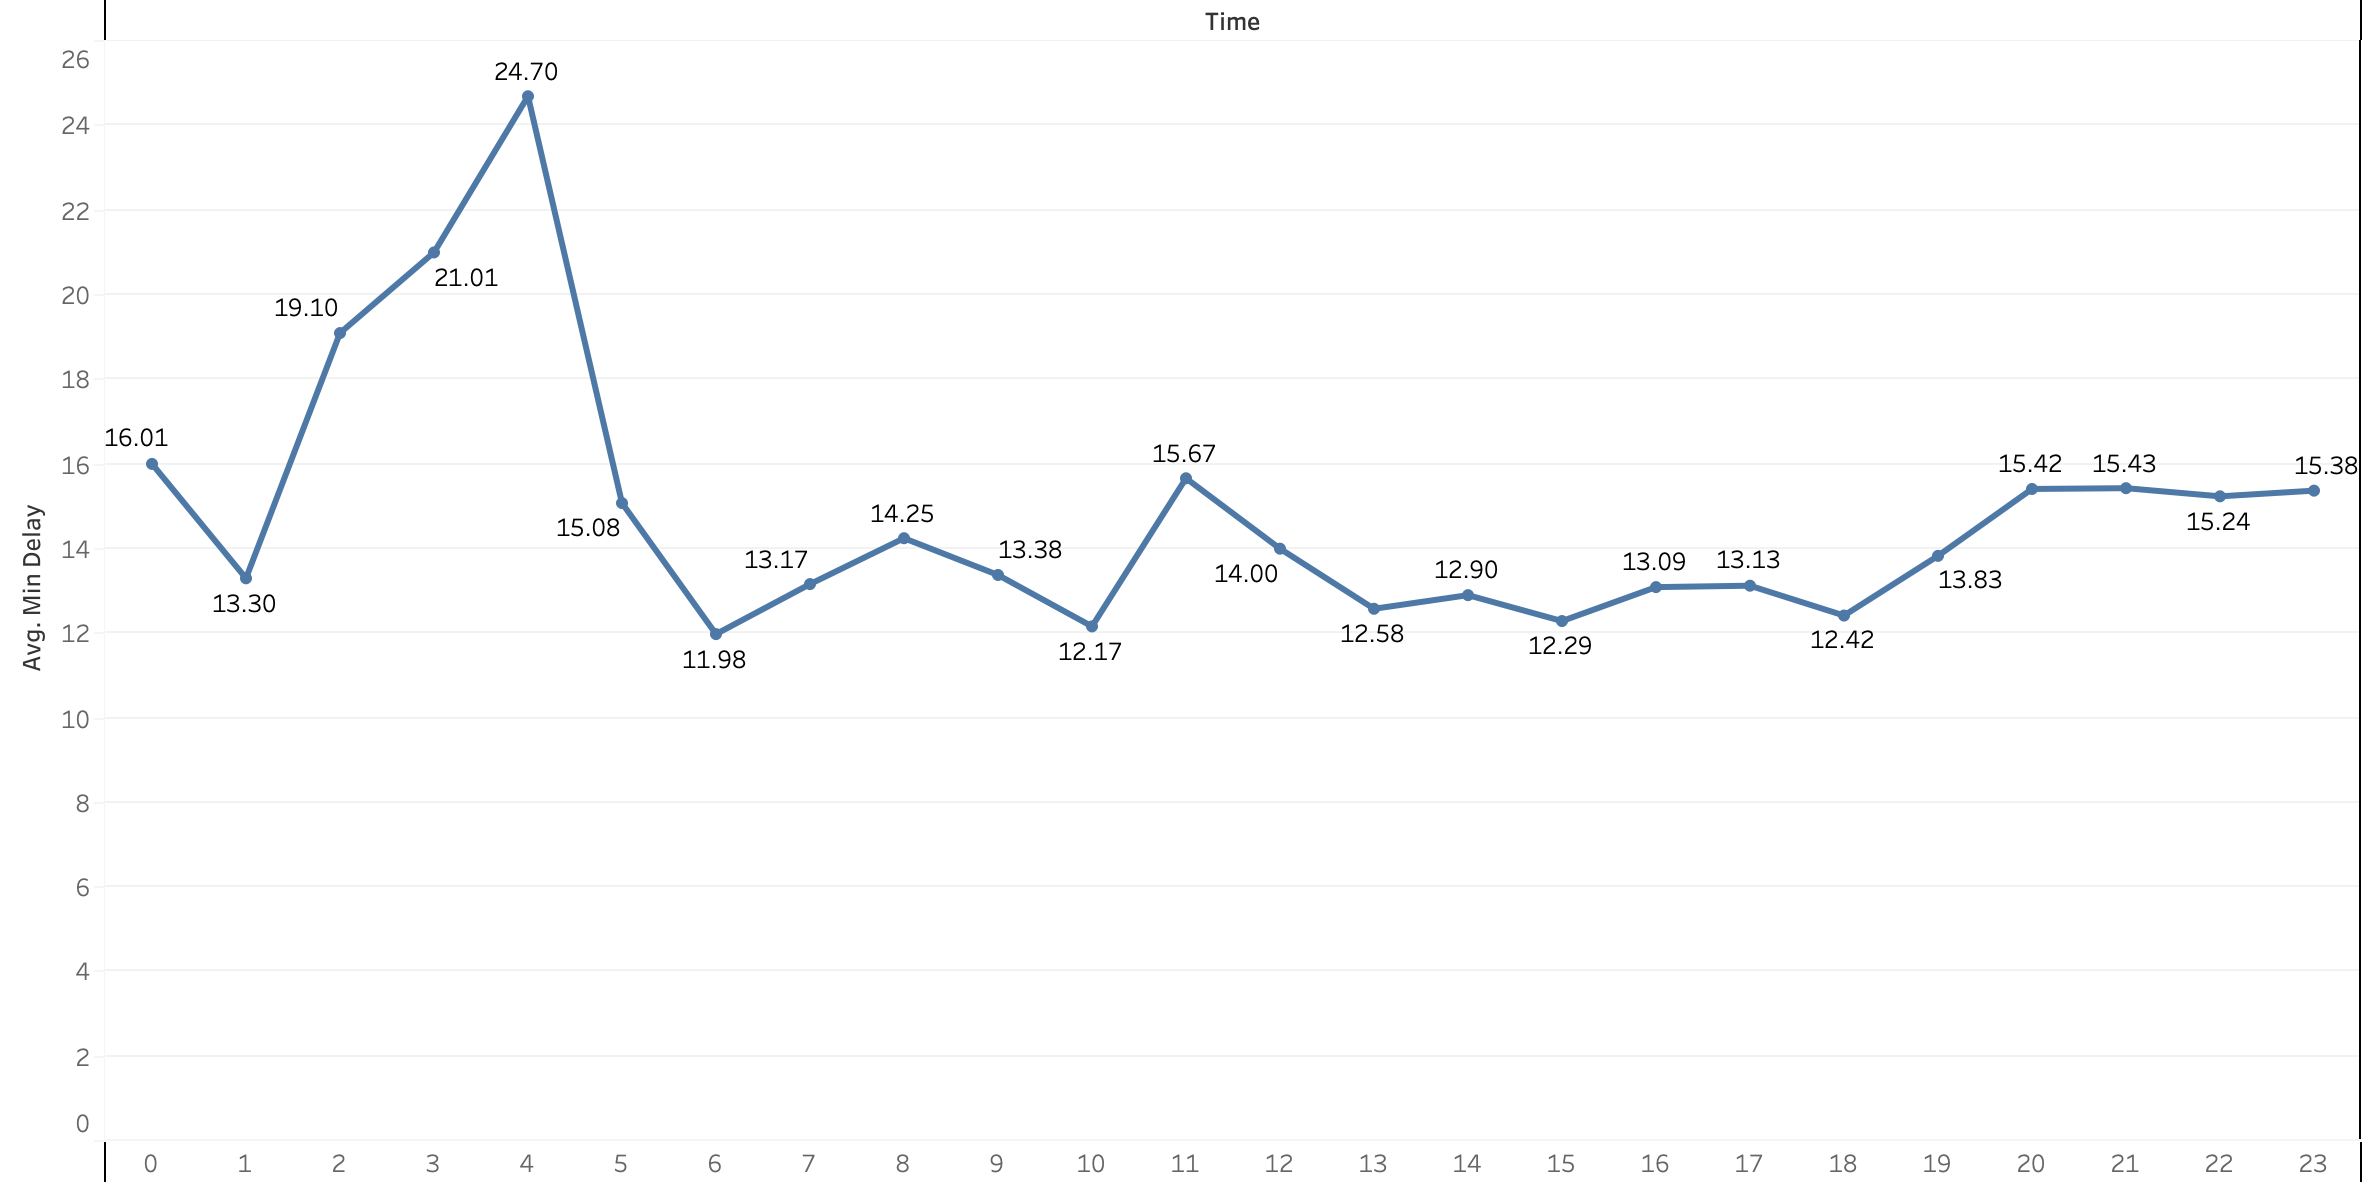

According to this line graph, it is noticeable that 4 AM has the highest number of minutes delayed compared to other times throughout the day. The rush hours between 8-9 AM and 5-7 PM seem to consistently experience delays of approximately 12-14 minutes.

#### What is the most common reason for delays?

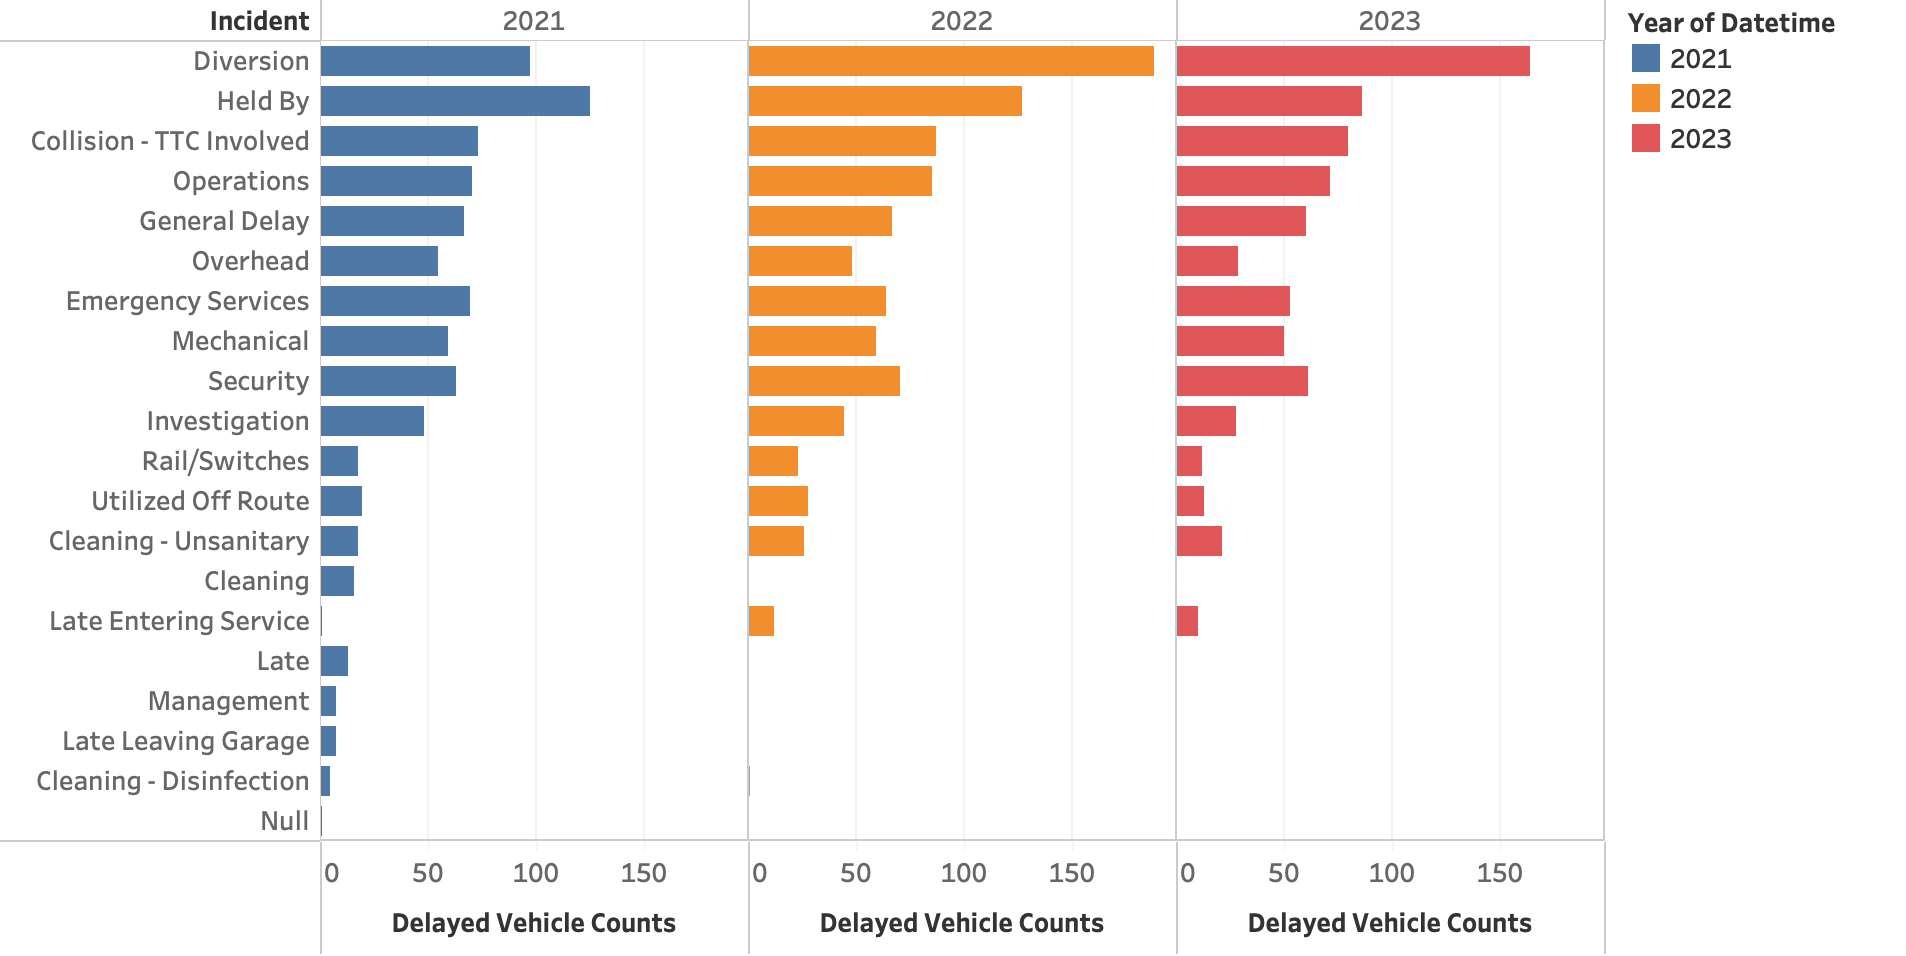

The chart displays a range of incident values, but its accuracy isn't reliable because incident reasons 'Diversion' and 'General Delay' seem duplicated. The underlying patterns of these incidents will be investigated throughout the project. By analyzing these incidents in conjunction with factors like time, location, and weather, we aim to bridge the gaps in our understanding and ultimately reveal the impact of weather conditions on TTC streetcar delays. Other than that, the chart is straightforward and serves as a important starting point for our analysis.

#### How does weather affect delay minutes?

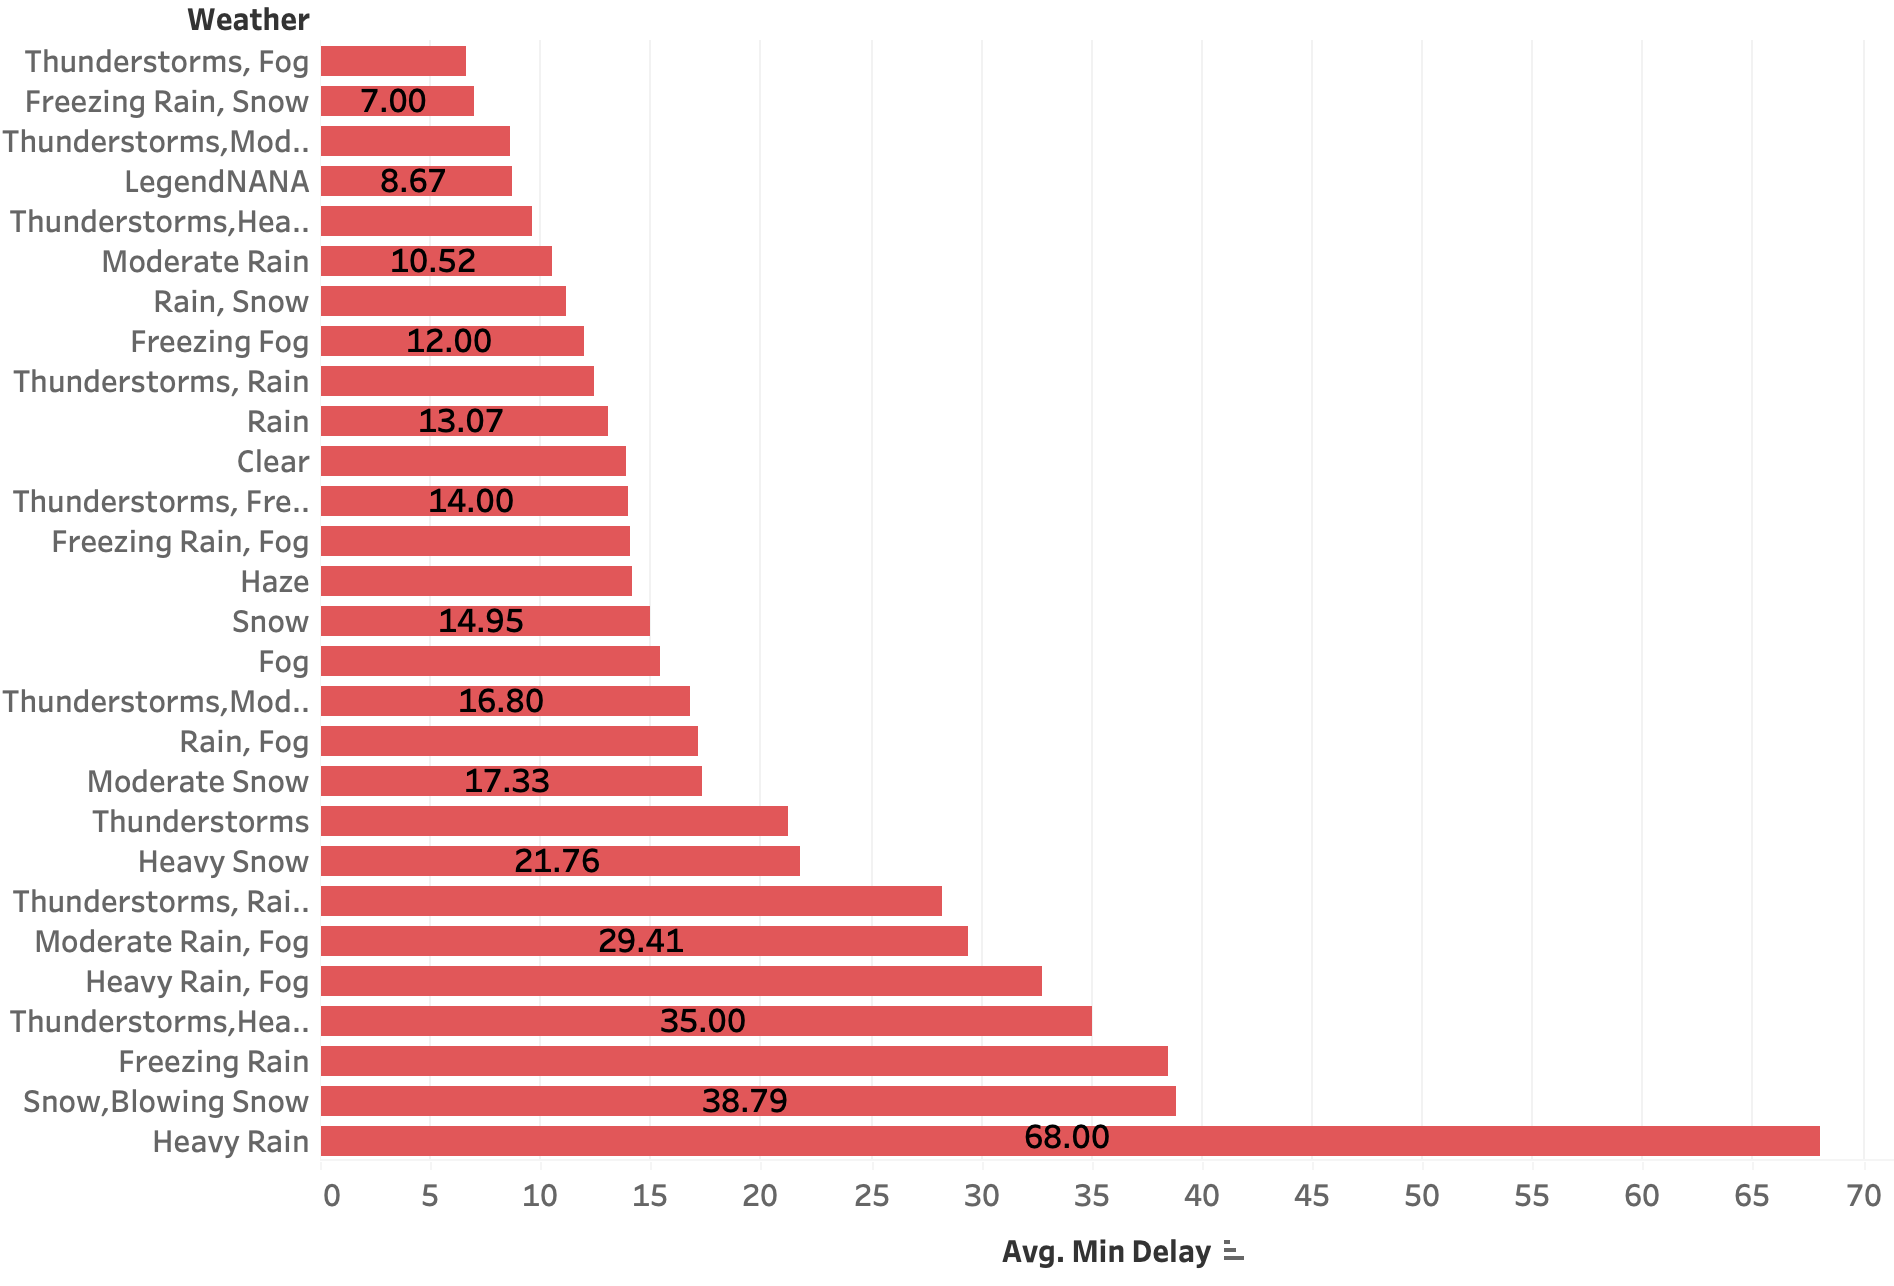

Multiple rows contain 'rain' combined with various other weather conditions, including thunderstorms, freezing rain, moderate rain, and more. Although these combinations looks challenging and duplicated, the weather definitions provide valuable insights for our analysis and hypothesis testing. As described in the chart above, heavy rainfall is associated with an average delay of 68 minutes. Further analysis can be conducted by considering factors such as visibility, temperature, and precipitation values to gain deeper insights into this relationship.

-----
### Summary

In conclusion, our dataset has very important variables and insights to create regression models to forecast delay predictions and find out the connection between weather and delays. 

----
###  Data Saving

In [104]:
#saving the dataframe to a new csv file! 
df.to_csv('Capstone_project_clean.csv', index=False)